In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report

In [29]:
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df[data.target_names[0]] = data.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class_0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [30]:
df.drop(columns=[data.target_names[0]]).describe().T

,count,mean,std,min,25%,50%,75%,max
alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
malic_acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
alcalinity_of_ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
total_phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
nonflavanoid_phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58
color_intensity,178.0,5.058090,2.318286,1.28,3.2200,4.690,6.2000,13.00


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.iloc[:,:13])
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [32]:
pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)
explain = pca_full.explained_variance_ratio_
cum_explain = np.cumsum(explain)
cum_explain

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

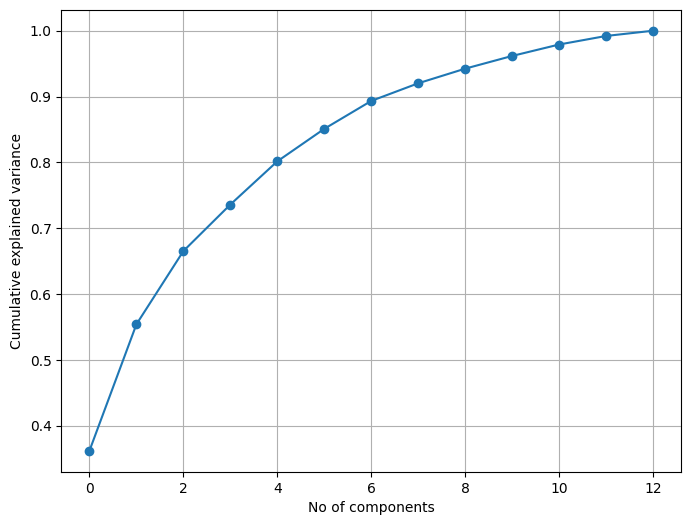

In [33]:
plt.figure(figsize=(8,6))
plt.plot(cum_explain,marker='o')
plt.xlabel('No of components')
plt.ylabel('Cumulative explained variance')
plt.grid()
plt.show()

In [41]:
def components_for_threshold(cum_variance, threshold):
    return int(np.argmax(cum_variance>=threshold) + 1)

k_90 = components_for_threshold(cum_explain,.90)
k_90

8

In [53]:
pca = PCA(n_components=k_90)
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(178, 8)

In [55]:
loadings = pd.DataFrame(
    pca.components_.T,
    index = df.drop(columns=[data.target_names[0]]).columns,
    columns = [f"PC{i+1}" for i in range(k_90)]
)
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
alcohol,0.144329,0.483652,-0.207383,-0.017856,-0.265664,0.213539,-0.056396,0.396139
malic_acid,-0.245188,0.224931,0.089013,0.536890,0.035214,0.536814,0.420524,0.065827
ash,-0.002051,0.316069,0.626224,-0.214176,-0.143025,0.154475,-0.149171,-0.170260
alcalinity_of_ash,-0.239320,-0.010591,0.612080,0.060859,0.066103,-0.100825,-0.286969,0.427970
magnesium,0.141992,0.299634,0.130757,-0.351797,0.727049,0.038144,0.322883,-0.156361
total_phenols,0.394661,0.065040,0.146179,0.198068,-0.149318,-0.084122,-0.027925,-0.405934
flavanoids,0.422934,-0.003360,0.150682,0.152295,-0.109026,-0.018920,-0.060685,-0.187245
nonflavanoid_phenols,-0.298533,0.028779,0.170368,-0.203301,-0.500703,-0.258594,0.595447,-0.233285
proanthocyanins,0.313429,0.039302,0.149454,0.399057,0.136860,-0.533795,0.372139,0.368227
color_intensity,-0.088617,0.529996,-0.137306,0.065926,-0.076437,-0.418644,-0.227712,-0.033797


##### Without PCA

In [63]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns=[data.target_names[0]]),data.target,test_size=.2,random_state=42,stratify=data.target)
pipe_no_pca = Pipeline([
    ('scaler',StandardScaler()),
    ('clf',LogisticRegression(max_iter=500))
])
pipe_no_pca.fit(X_train,y_train)
y_pred_no_pca = pipe_no_pca.predict(X_test)
accuracy_score(y_test,y_pred_no_pca)

0.9722222222222222

##### With PCA

In [64]:
pipe_pca = Pipeline([
    ('scaler',StandardScaler()),
    ('pca',PCA(n_components=k_90)),
    ('clf',LogisticRegression(max_iter=500))
])
pipe_pca.fit(X_train,y_train)
y_pred_pca = pipe_pca.predict(X_test)
accuracy_score(y_test,y_pred_pca)

0.9722222222222222